# Фильтруем строки

### Where
Мы уже знаем, что делать, если нам нужны лишь несколько столбцов из таблицы. Но как быть, если мы хотим видеть не все строки, а только некоторые из них. В таком случае нам пригодится ключевое слово WHERE.

Попробуйте в Metabase!

Получим для примера всю информации о фильме, занимающем первую позицию.

Запрос

SELECT *\
FROM sql.kinopoisk\
WHERE position = 1\

Детализация

SELECT * /*выбор всех столбцов*/\
        FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/\
        WHERE position = 1 /*с позицией 1*/

В запросах выше мы использовали знак равно (=), но никто не запретит нам использовать и условные операторы.

Вы можете применять знаки < (меньше), <= (меньше или равно), > (больше), >= (больше или равно).

Попробуйте в Metabase!

Посмотрим на фильмы, которые вышли в прокат до 1984 года.

Запрос

SELECT\
      position,\
      movie_title,\
      year,\
      director\
  FROM sql.kinopoisk\
  WHERE year < 1984\

Детализация

SELECT /*выбор всех полей*/\
      position, /*столбец position*/\
      movie_title, /*столбец movie_title*/\
      year, /*столбец year*/\
      director /*столбец director*/\
  FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/\
  WHERE year < 1984 /*при условии, что год создания меньше 1984*/

При этом вы можете комбинировать вывод конкретных столбцов и условия.

Ещё один условный оператор, который нам доступен, — знак неравенства != или <>.

Попробуйте в Metabase!

Выведем все столбцы для всех фильмов, кроме тех, что были сняты в 2000 году.

Запрос

SELECT *\
      FROM sql.kinopoisk\
      WHERE year <> 2000\

Детализация

SELECT * /*выбор всех полей*/\
      FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/\
      WHERE year <> 2000 /*если год создания не 2000*/
      

### AND и OR
Допустим, одного условия нам мало.

В таком случае мы можем комбинировать их с помощью AND и OR.

Попробуйте в Metabase!

Типичная ситуация: выбираем фильм на вечер. Мы хотим, чтобы фильм был относительно современным и с высоким рейтингом.

Запрос

SELECT *\
      FROM sql.kinopoisk \
      WHERE year >= 2000\
      AND rating >= 8\

Детализация

SELECT * /*выбор всех полей*/\
      FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/\
      WHERE year >= 2000 /*при условии, что год создания больше или равен 2000*/\
      AND rating >= 8 /*и с рейтингом от 8 и выше*/
      

Попробуйте заменить в запросе AND на OR — так вы получите фильмы, которые или вышли в 2000 году и позднее, или имеют высокий рейтинг.

Попробуйте в Metabase!

Теперь вы хотите получить информацию о фильмах, которые вышли между 1975 и 1985 годами включительно. Можно воспользоваться следующим запросом:

Запрос

SELECT *\
      FROM sql.kinopoisk\
      WHERE year >= 1975\
          AND year <= 1985\

Детализация

SELECT * /*выбор всех полей*/\
      FROM sql.kinopoisk /*из таблицы sqk.kinopoisk*/\
      WHERE year >= 1975 /*при условии, что год создания 1975 и позднее*/\
          AND year <= 1985 /*и ранее 1985*/
      

### Between
Мы только что отправили запрос для вывода данных по фильмам с 1975 и 1985 годы. Цели мы достигли, но сама запись оставляет желать лучшего.

Попробуйте в Metabase!

Можем оптимизировать её, сделав более элегантной с помощью BETWEEN:

Запрос

SELECT *\
      FROM sql.kinopoisk\
      WHERE year BETWEEN 1975 AND 1985\

Детализация

SELECT * /*выбор всех полей*/\
      FROM sql.kinopoisk /*из таблиц sql.kinopoisk*/\
      WHERE year BETWEEN 1975 AND 1985 /*при условии, что год создания лежит в промежутке между 1975 и 1985*/
      
Если вы знаете английский, назначение BETWEEN не станет для вас неожиданностью: оператор фильтрует строки, которые находятся между двумя значениями.

Обратите внимание! В PostgreSQL указанные значения включаются в интервал. В других СУБД BETWEEN может работать иначе и не включать указанные значения.

### NOT
В дополнение к другим операторам можно использовать ключевое слово NOT — оно «переворачивает» следующий за ним оператор.

Попробуйте в Metabase!

Выведем все фильмы, кроме тех, что вышли с 1965 по 1980 годы.

Запрос

SELECT *\
      FROM sql.kinopoisk\
      WHERE year NOT BETWEEN 1965 AND 1980\

Детализация

SELECT * /*выбор всех полей*/\
      FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/\
      WHERE year NOT BETWEEN 1965 AND 1980 /*при условии, что год создания не лежит в промежутке между 1965 и 1980*/\
      

Если включаете в запрос несколько условий AND и OR, используйте скобки: они работают так же, как и с арифметическими операциями.

Важно! Условия в скобках имеют больший приоритет.

Попробуйте в Metabase!

Запрос

SELECT\
      year,\
      movie_title,\
      director\
  FROM sql.kinopoisk\
  WHERE (rating > 8.5 AND year < 2000)\
      OR year >= 2000\

Детализация

SELECT /*выбор*/\
      year, /*столбец year*/\
      movie_title, /*столбец movie_title*/\
      director /*столбец director*/\
  FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/\
  WHERE (rating > 8.5 AND year < 2000) /*при условии, что рейтинг больше 8.5 и год создания до 2000*/\
      OR year >= 2000 /*или год создания — 2000 и позднее*/
  

### IN
Ещё один полезный оператор для фильтрации строк — IN.

Конструкции с IN имеют следующий вид:

column IN (value1, value2, value3)

Эта запись аналогична следующей: column = value1 OR column = value2 OR column = value3 — но выглядит проще и компактнее.

До этого при работе с WHERE мы использовали только числа, но мы можем проводить манипуляции и c данными типа текст.

Обратите внимание! Текстовые значения обязательно должны заключаться в одинарные кавычки.
Попробуйте в Metabase!

Давайте получим информацию о всех фильмах Леонида Гайдая.

Запрос

SELECT *\
      FROM sql.kinopoisk\
      WHERE director = 'Леонид Гайдай'\

Детализация

SELECT * /*выбор всех полей*/\
      FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/\
      WHERE director = 'Леонид Гайдай' /*где режиссёр Леонид Гайдай*/
      
Попробуйте изменить условие на director = 'ЛЕОНИД ГАЙДАЙ'.

Как видите, ничего не отобразилось, потому что в текстовых полях важен регистр.

### LIKE
Предположим, мы не знаем точно, какое текстовое значение ищем.

В таком случае нам поможет оператор LIKE.

Попробуйте в Metabase!

Например, чтобы получить все фильмы, название которых начинается на А (кириллическую), мы воспользуемся таким запросом:

Запрос

SELECT *\
      FROM sql.kinopoisk\
      WHERE movie_title LIKE 'А%'\

Детализация

SELECT * /*выбор всех полей*/\
      FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/\
      WHERE movie_title LIKE 'А%' /*если название фильма начинается на А*/
      
Знак процента (%) в примере показывает, что после A встречается ноль и более символов. Вы можете использовать % в любом месте внутри строки.

Например, movie_title LIKE '%а%б%' выведет все фильмы, в названии которых встречается строчная буква а, а где-то после неё — б.

Также в текстовых строках используется знак подчёркивания (_) — он заменяет ровно один любой символ.

### NULL
Вернёмся к просмотру всей таблицы с ТОП-250.

Вы можете заметить, что у некоторых строк заполнены не все столбцы.

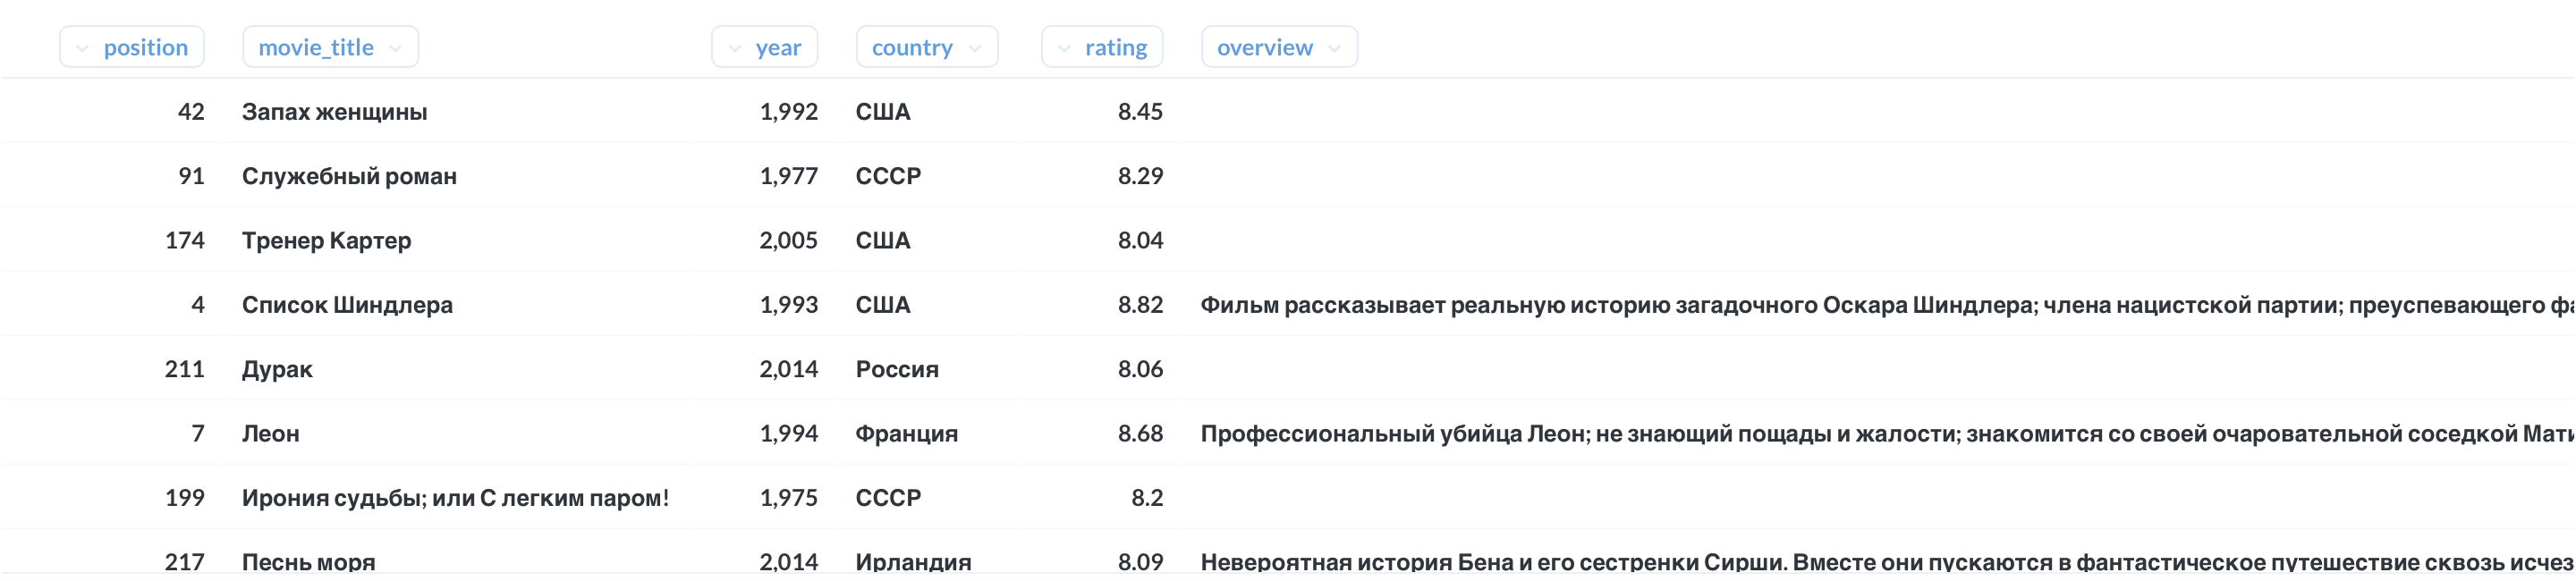

Для пустых значений есть специальное обозначение — NULL.

Попробуйте в Metabase!

При этом вы не можете просто приравнять значение к NULL. Проверим это на следующем запросе:

Запрос

SELECT *\
      FROM sql.kinopoisk\
      WHERE overview = NULL

Детализация

SELECT * /*выбор всех полей*/\
      FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/\
      WHERE overview = NULL /*если у фильма отсутствует описание*/
      
Как вы заметили, вывод пустой, хотя мы точно видели фильмы с отсутствующим описанием.

А теперь попробуйте изменить условие на overview IS NULL.

Если вы всё сделали верно, то получили все фильмы, у которых в таблице отсутствует описание.

Вы можете добавить к условию уже изученное ключевое слово NOT, чтобы получилось overview IS NOT NULL, тогда в выводе вы увидите только фильмы с заполненным описанием.

Важно! NULL — это специальное значение. Если вы фильтруете столбец, в котором есть пустые значения, по любому условию, кроме IS NULL / IS NOT NULL, такие значения будут исключены из вывода.